## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

## Summary of Findings:

There are recurring cycles of login demand both weekly and daily.

The weekly trend is that traffic starts out low on Mondays and gradually increases throughout the week. Demand peaks on Saturdays, but is also high on Sundays before dropping off on Mondays to begin the weekly cycle again.

On a daily scale, demand peaks later at night into the early morning. Logins dip drastically during the morning commute hours and then spike again around lunchtime. After that they drop off, though not as drastically in the morning, before picking up again in the evening once again.

See the sections below labelled "Weekly" and "Daily" for more details - including key visualizations.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [12]:
logins = pd.read_json('logins.json')

In [13]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [14]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [15]:
logins.set_index('login_time', drop=True, inplace=True)
logins['count'] = 1
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [40]:
agg_logins = logins.resample('15min').count()

In [41]:
agg_logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [42]:
agg_logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


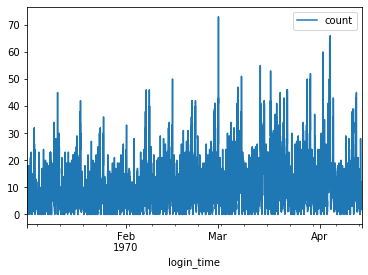

In [18]:
agg_logins.plot()

Plotting the entire series is a bit noisy, but there definitely appear to be clear seasonal peaks. Let's look at each month one by one to get a better idea.

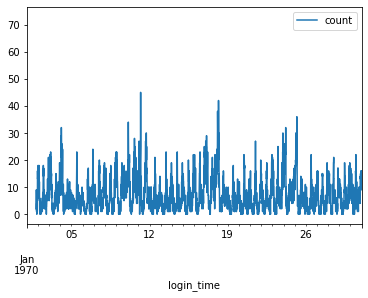

In [19]:
agg_logins.plot(xlim=('1970-01-01','1970-01-31'))

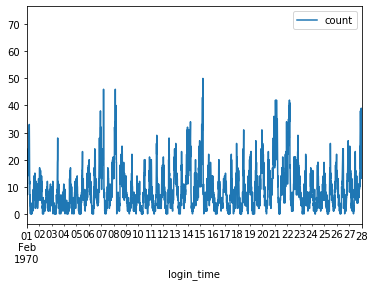

In [20]:
agg_logins.plot(xlim=('1970-02-01','1970-02-28'))

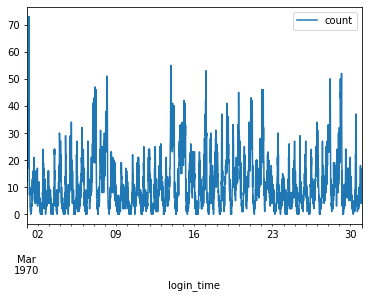

In [21]:
agg_logins.plot(xlim=('1970-03-01','1970-03-31'))

The biggest peaks appear to happen roughly weekly, but there seem to be daily cycles as well. Will examine each of those in a bit more depth.

### Weekly

For weekly patterns, will be helpful to know what day of the week a date is.

In [43]:
agg_logins['weekday'] = agg_logins.index.dayofweek

In [51]:
counts_by_day = agg_logins.groupby('weekday')['count'].mean()
display(counts_by_day)

weekday
0     6.213380
1     6.895833
2     7.692708
3     8.794118
4    10.561111
5    13.456250
6    12.615972
Name: count, dtype: float64

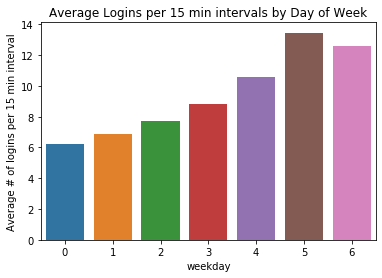

In [56]:
fig, ax1 = plt.subplots()
ax1.set_title('Average Logins per 15 min intervals by Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average # of logins per 15 min interval')
sns.barplot(counts_by_day.index, counts_by_day.values, ax=ax1)

### Daily

In [58]:
agg_logins['hour'] = agg_logins.index.hour
agg_logins.head()

,count,weekday,hour
login_time,,,
1970-01-01 20:00:00,2,3,20
1970-01-01 20:15:00,6,3,20
1970-01-01 20:30:00,9,3,20
1970-01-01 20:45:00,7,3,20
1970-01-01 21:00:00,1,3,21


In [59]:
counts_by_hour = agg_logins.groupby('hour')['count'].mean()
display(counts_by_hour)

hour
0     14.688725
1     15.482843
2     14.215686
3     11.840686
4     12.338235
5      7.218137
6      2.789216
7      1.997549
8      2.004902
9      3.742647
10     7.509804
11    14.213235
12    12.166667
13     8.850490
14     8.397059
15     7.446078
16     6.941176
17     6.333333
18     7.303922
19     8.007426
20    10.056373
21    13.781863
22    16.193627
23    14.848039
Name: count, dtype: float64

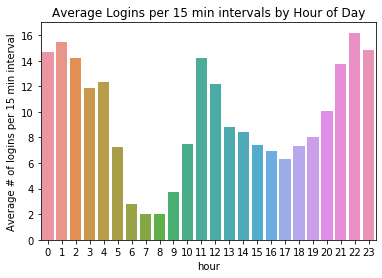

In [61]:
fig, ax2 = plt.subplots()
ax2.set_title('Average Logins per 15 min intervals by Hour of Day')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Average # of logins per 15 min interval')
sns.barplot(counts_by_hour.index, counts_by_hour.values, ax=ax2)